In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


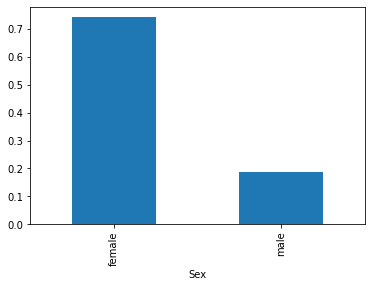

In [5]:
df = train.groupby('Sex').mean()['Survived']
df.plot(kind='bar')
plt.show()

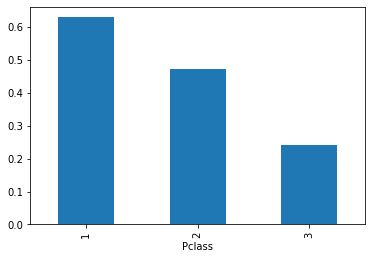

In [6]:
df = train.groupby('Pclass').mean()['Survived']
df.plot(kind='bar')
plt.show()

In [7]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)

In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
train.dropna(inplace=True)

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
for i in train.index:
  if train.loc[i, 'Sex']=='male':
    train.loc[i,'Sex']=1
  else:
    train.loc[i,'Sex']=0

In [12]:
target = np.ravel(train.Survived)

In [13]:
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)

In [14]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train, target, test_size=0.2, random_state=42)

In [15]:
train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
328,3.0,0.0,31.0,1.0,1.0,20.5250
73,3.0,1.0,26.0,1.0,0.0,14.4542
253,3.0,1.0,30.0,1.0,0.0,16.1000
719,3.0,1.0,33.0,0.0,0.0,7.7750
666,2.0,1.0,25.0,0.0,0.0,13.0000


In [16]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 328 to 130
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  571 non-null    float64
 1   Sex     571 non-null    float64
 2   Age     571 non-null    float64
 3   SibSp   571 non-null    float64
 4   Parch   571 non-null    float64
 5   Fare    571 non-null    float64
dtypes: float64(6)
memory usage: 31.2 KB


In [17]:
model=keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2022-08-17 19:09:54.763589: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 19:09:54.764406: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [33]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_titanic.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model.fit(train_scaled, train_target, batch_size=571, epochs=200, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 571 samples, validate on 143 samples
Epoch 1/200
571/571 [==============================] - 1s 1ms/sample - loss: 0.4061 - accuracy: 0.8161 - val_loss: 0.4685 - val_accuracy: 0.7692
Epoch 2/200
571/571 [==============================] - 0s 17us/sample - loss: 0.3973 - accuracy: 0.8196 - val_loss: 0.4741 - val_accuracy: 0.7902
Epoch 3/200
571/571 [==============================] - 0s 23us/sample - loss: 0.3941 - accuracy: 0.8179 - val_loss: 0.4803 - val_accuracy: 0.7972
Epoch 4/200
571/571 [==============================] - 0s 18us/sample - loss: 0.3956 - accuracy: 0.8214 - val_loss: 0.4825 - val_accuracy: 0.7902
Epoch 5/200
571/571 [==============================] - 0s 20us/sample - loss: 0.3947 - accuracy: 0.8196 - val_loss: 0.4791 - val_accuracy: 0.7902
Epoch 6/200
571/571 [==============================] - 0s 23us/sample - loss: 0.3912 - accuracy: 0.8231 - val_loss: 0.4759 - val_accuracy: 0.8042
Epoch 7/200
571/571 [==============================] - 0s 25us/sample - loss: 0

In [19]:
model.evaluate(val_scaled,val_target)

143/143 [==============================] - 0s 39us/sample - loss: 0.5003 - accuracy: 0.7133


[0.5003209951874259, 0.7132867]

In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
test.dropna(inplace=True)
for i in test.index:
  if test.loc[i, 'Sex']=='male':
    test.loc[i,'Sex']=1
  else:
    test.loc[i,'Sex']=0
test = test.astype(float)

In [22]:
model.predict(test, verbose=1)

331/331 [==============================] - 0s 214us/sample


array([[0.12143543],
       [0.2931366 ],
       [0.05710477],
       [0.1346685 ],
       [0.6084297 ],
       [0.18833381],
       [0.54744124],
       [0.25065082],
       [0.7464163 ],
       [0.29027522],
       [0.21658903],
       [0.7663406 ],
       [0.07877746],
       [0.85278904],
       [0.80171007],
       [0.11728612],
       [0.15543494],
       [0.44359398],
       [0.39603686],
       [0.5542194 ],
       [0.43767273],
       [0.5169258 ],
       [0.64935714],
       [0.06456429],
       [0.81245005],
       [0.15340069],
       [0.44657913],
       [0.07741159],
       [0.46244675],
       [0.43497205],
       [0.51599365],
       [0.1725986 ],
       [0.7134489 ],
       [0.11762166],
       [0.07981697],
       [0.09437457],
       [0.84223807],
       [0.85789514],
       [0.14364961],
       [0.36121944],
       [0.90057427],
       [0.60789245],
       [0.51599365],
       [0.11029786],
       [0.70905256],
       [0.51599365],
       [0.51599365],
       [0.119

In [23]:
prediction = list(model.predict(test))
submission = pd.DataFrame({
    "Pclass": test["Pclass"],
    "Sex" : test["Sex"],
    "Age" : test["Age"],
    "Parch" : test["Parch"],
    "Fare" : test["Fare"],
    "Survived" : prediction
})
submission.to_csv('submission.csv', index=False)

In [24]:
model = keras.models.load_model('best-model_titanic.h5')

model.evaluate(val_scaled, val_target)

143/143 [==============================] - 0s 827us/sample - loss: 0.5003 - accuracy: 0.7133


[0.5003209951874259, 0.7132867]